Nama : Nabila Aprillia

NPM : 2108107010025

Tugas 3 Artificial Neural Networks (ANN) regresi

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/hassanoukhouya/energycsv

*Dataset yang disebutkan dalam sumber adalah dataset "energy" yang mencakup data beban listrik dari September 1, 2014, hingga Desember 31, 2014. Data ini memprediksi beban listrik.

*Informasi Atribut:

timestamp
load
temp
Studi Kasus : Memprediksi Beban listrik yang dipakai dari September 1, 2014, hingga Desember 31, 2014

### Import Library

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.callbacks import History

In [2]:
df = pd.read_csv('data/energy.csv')
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


In [3]:
df = pd.read_csv('data/energy.csv')
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


In [4]:
# informasi statistik dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
load,26304.0,3303.769199,564.579253,1979.000000,2867.000000,3364.000000,3690.000000,5224.0
temp,26304.0,47.765638,19.338142,-13.666667,32.666667,48.333333,63.666667,95.0


### Prepocessing Data

In [5]:
# cek apakah ada missing value pada dataset
df.isnull().sum()

timestamp    0
load         0
temp         0
dtype: int64

In [6]:
# cek apakah ada duplikat data pada dataset
df.duplicated().sum()

0

In [7]:
# Konversi timestamp ke tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Normalisasi Data

In [8]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
df[['load', 'temp']] = scaler.fit_transform(df[['load', 'temp']])

### Split Dataset

In [9]:
# Membagi data menjadi fitur (X) dan target (y)
X = df[['temp']]
y = df['load']

In [10]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membangun Model

In [21]:
# Inisialisasi model
model = Sequential()

# Tambahkan layer input
model.add(Dense(10, input_dim=1, activation='relu')) # 10 neuron dalam layer tersembunyi, input_dim sesuai dengan jumlah fitur

# Tambahkan layer tersembunyi
model.add(Dense(10, activation='relu')) # Anda dapat menyesuaikan jumlah neuron dan layer tersembunyi sesuai kebutuhan

# Tambahkan layer output
model.add(Dense(1, activation='linear')) # 1 neuron untuk memprediksi load

# Kompilasi model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


/home/nabilaaprillia/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8273 - mean_squared_error: 0.8273 - val_loss: 0.6677 - val_mean_squared_error: 0.6677
Epoch 2/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6888 - mean_squared_error: 0.6888 - val_loss: 0.6683 - val_mean_squared_error: 0.6683
Epoch 3/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6835 - mean_squared_error: 0.6835 - val_loss: 0.6713 - val_mean_squared_error: 0.6713
Epoch 4/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6848 - mean_squared_error: 0.6848 - val_loss: 0.6642 - val_mean_squared_error: 0.6642
Epoch 5/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6811 - mean_squared_error: 0.6811 - val_loss: 0.6669 - val_mean_squared_error: 0.6669
Epoch 6/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6806 - mean_squared_error: 0.6806 - val_loss: 0.6630 - val_mean_squared_error: 0.6630
Epoch 7/100
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6811 - mean_squared_error: 0.6811 - val_los

* Layer input memiliki 10 neuron dengan fungsi aktivasi ReLU.
* Layer output memiliki satu neuron dengan fungsi aktivasi linear.
* Model dikompilasi dengan menggunakan mean squared error sebagai loss function, adam optimizer, dan metrik mean squared error.
* Jumlah epochs adalah 100, batch size adalah 32, dan validation split adalah 0.2.

In [22]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6862 - mean_squared_error: 0.6862
Test loss: [0.6869631409645081, 0.6869631409645081]


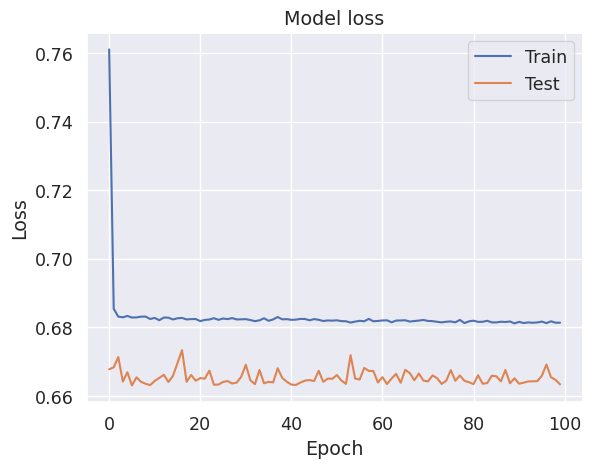

In [23]:
# Plot history untuk melihat perkembangan loss selama pelatihan
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [28]:
import numpy as np

# Misalkan ini adalah contoh data baru yang ingin Anda prediksi
X_new_data = np.array([[0.2], [0.4], [0.6]])

# Menggunakan model untuk memprediksi data baru
predictions = model.predict(X_new_data)

# Menampilkan hasil prediksi
print("Predictions:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Predictions:
[[-0.57590365]
 [-0.5768709 ]
 [-0.4930423 ]]


Model memprediksi nilai target untuk data baru dengan menggunakan fitur tunggal [0.2], [0.4], dan [0.6], menghasilkan prediksi berupa [-0.57590365], [-0.5768709], dan [-0.4930423] secara berturut-turut. 